<a href="https://colab.research.google.com/github/rafaelalorenzini/Machine-Learning/blob/main/Prophet_covid_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de séries temporais de dados da covid usando o Facebook Prophet.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv', sep=';', encoding='utf-8')

In [ ]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [ ]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [ ]:
import matplotlib as mpl
import seaborn as sns

In [ ]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (10,8)

azul mais forte é a média!

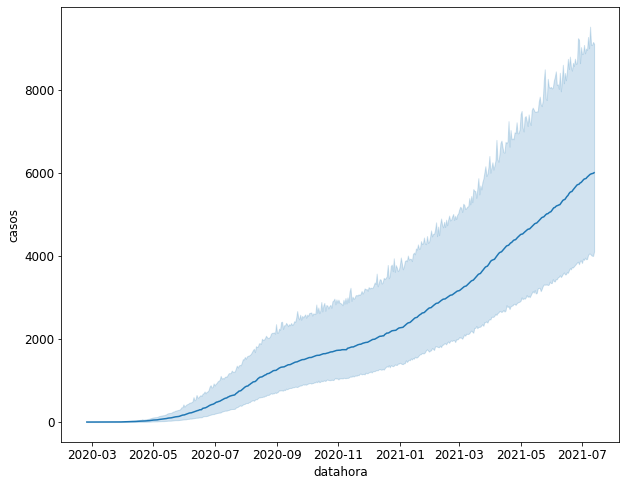

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dados)

$$ e^x$$ 

In [ ]:
import numpy as np

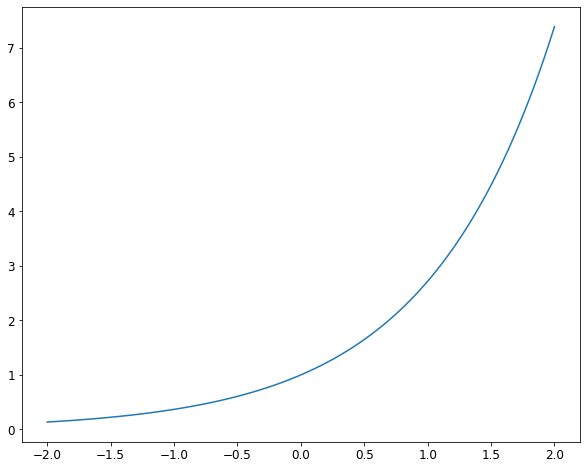

In [ ]:
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)
sns.lineplot(x= eixo_x,y= y_exp)

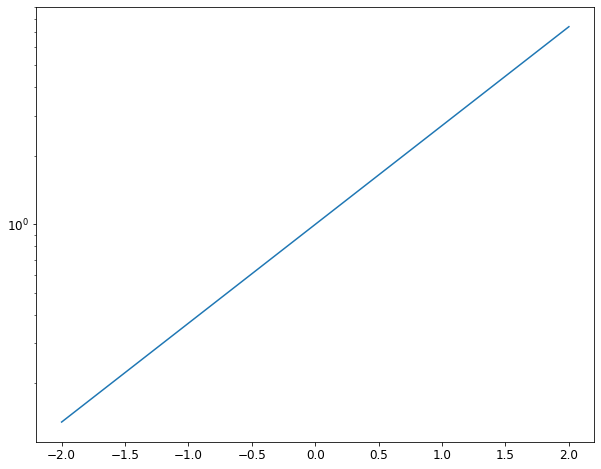

In [ ]:
sns.lineplot(x= eixo_x,y= y_exp)
mpl.pyplot.yscale('log')

In [ ]:
dado_sp = dados.query('nome_munic == "São Paulo"')

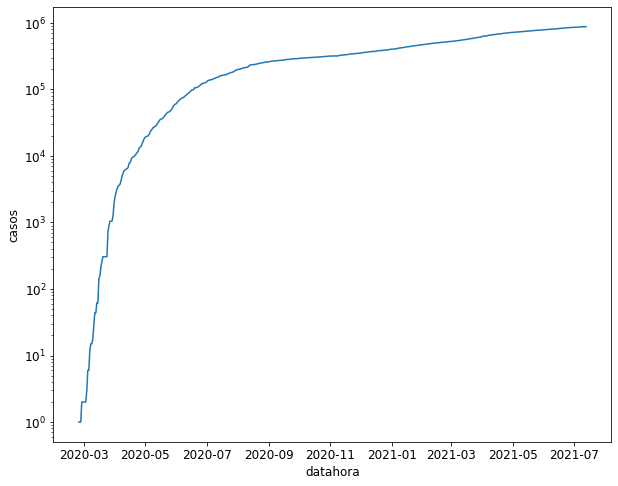

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dado_sp)
mpl.pyplot.yscale('log')

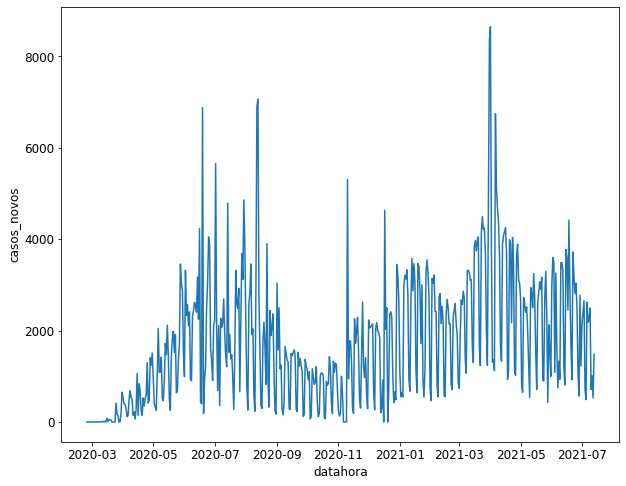

In [ ]:
sns.lineplot(x='datahora',y='casos_novos',data=dado_sp)

taxa de crescimento diff

In [ ]:
dado_sp['taxa_crescimento'] = dado_sp['casos_novos'].diff()
dado_sp['taxa_crescimento_obitos'] = dado_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


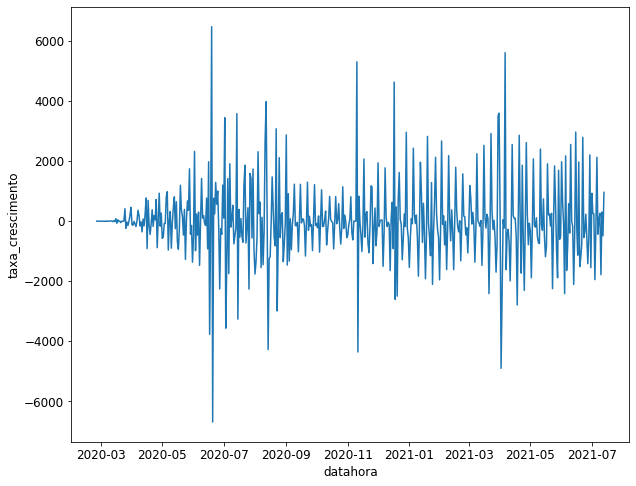

In [ ]:
sns.lineplot(x='datahora',y='taxa_crescimento',data=dado_sp)

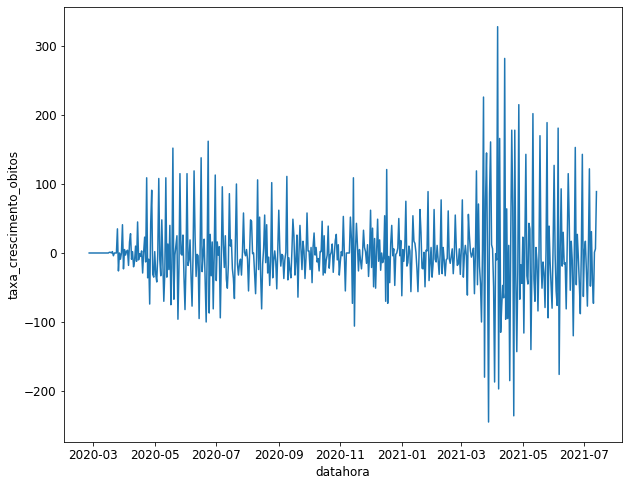

In [ ]:
sns.lineplot(x='datahora',y='taxa_crescimento_obitos',data=dado_sp)

In [ ]:
import matplotlib.pyplot as plt


<BarContainer object of 505 artists>

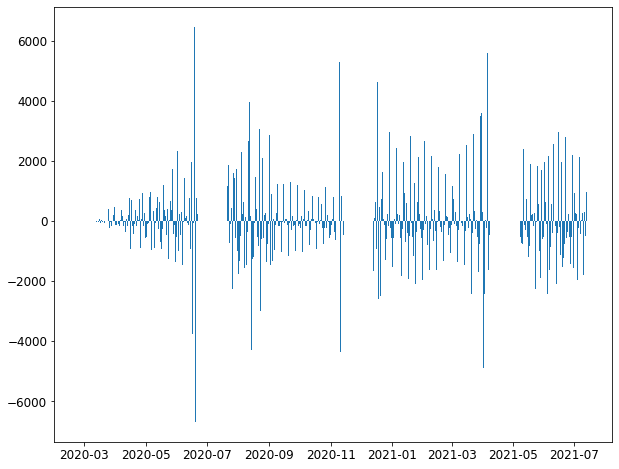

In [ ]:
plt.bar(dado_sp['datahora'],dado_sp['taxa_crescimento'])

In [ ]:
dado_sp['ano'] = pd.DatetimeIndex(dado_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_2021 = dado_sp.query('ano==2021')

<BarContainer object of 194 artists>

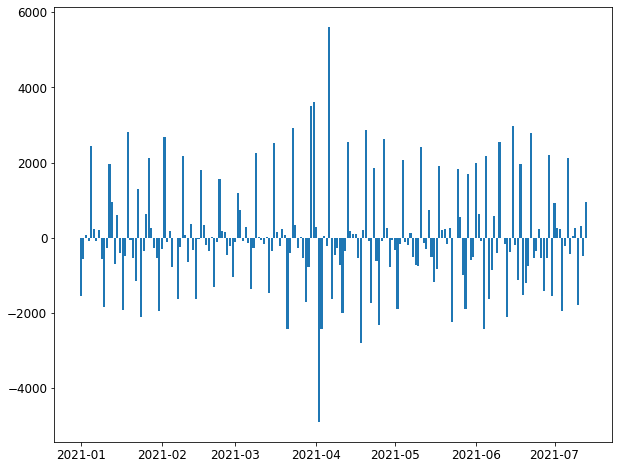

In [ ]:
plt.bar(dados_2021['datahora'],dados_2021['taxa_crescimento'])

In [ ]:
dado_sp['media_movel_casos']=dado_sp['casos_novos'].rolling(window=7,center=False).mean()
dado_sp['media_movel_obitos']=dado_sp['obitos_novos'].rolling(window=7,center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


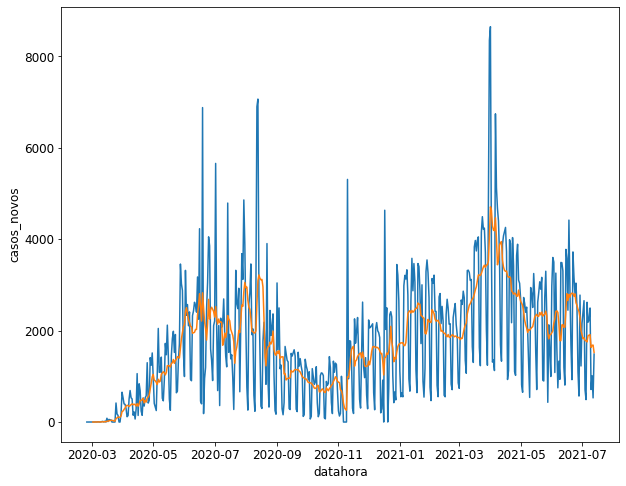

In [ ]:
sns.lineplot(x='datahora',y='casos_novos',data=dado_sp)
sns.lineplot(x='datahora',y='media_movel_casos',data=dado_sp)

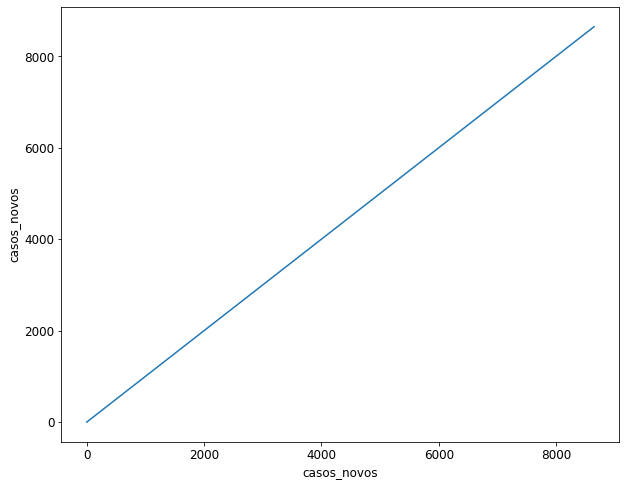

In [ ]:
sns.lineplot(x='casos_novos',y='casos_novos',data=dado_sp)



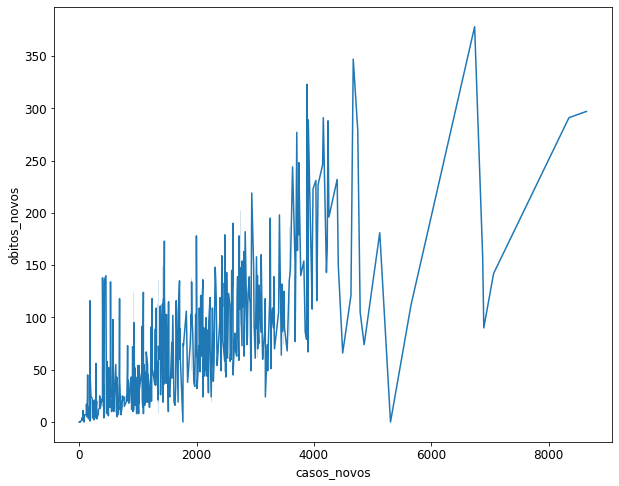

In [ ]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dado_sp)

In [ ]:
dado_sp[['casos_novos','obitos_novos']]

,casos_novos,obitos_novos
562,0,0
1207,0,0
1852,0,0
2497,1,0
3142,0,0
...,...,...
323062,2494,80
323707,711,7
324352,1013,8
324997,528,14


In [ ]:
dados_20211 = dado_sp.query('mes==1 & ano==2021')
dados_20212 = dado_sp.query('mes==2 & ano==2021')
dados_20213 = dado_sp.query('mes==3 & ano==2021')
dados_20214 = dado_sp.query('mes==4 & ano==2021')

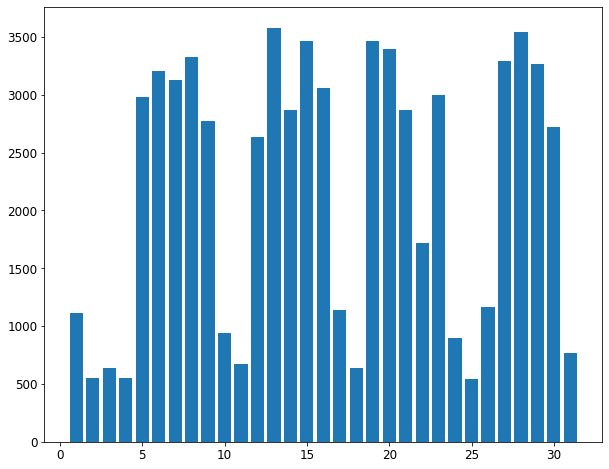

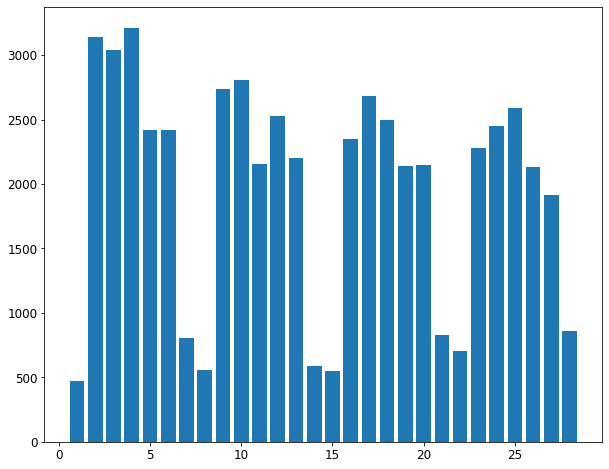

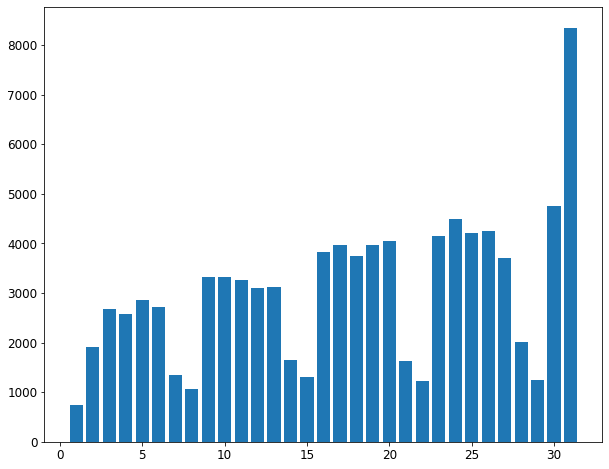

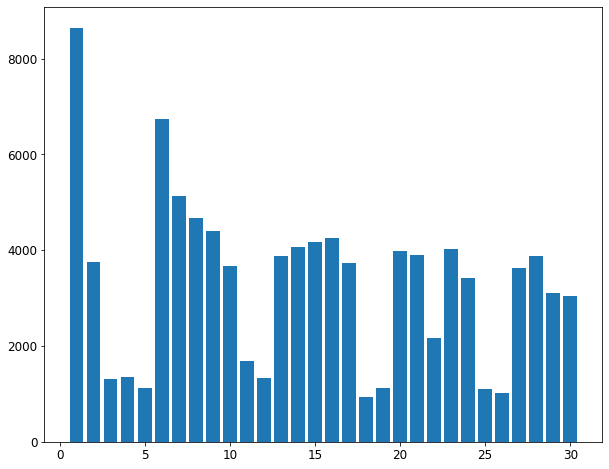

In [ ]:
plt.bar(np.linspace(1,31,31),dados_20211['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dados_20212['casos_novos'])
plt.show()
plt.bar(np.linspace(1,31,31),dados_20213['casos_novos'])
plt.show()
plt.bar(np.linspace(1,30,30),dados_20214['casos_novos'])
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot

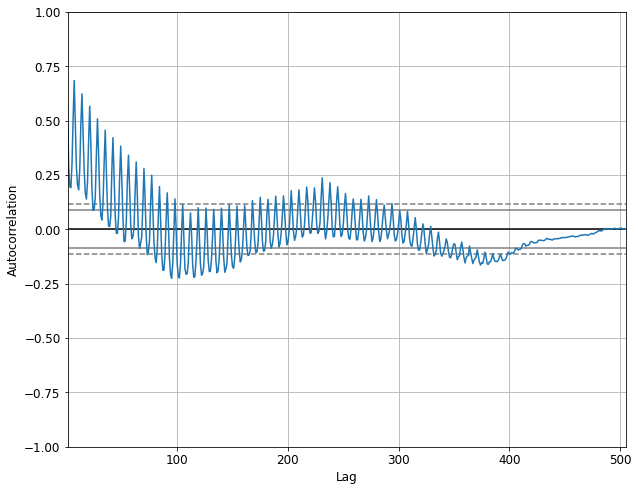

In [ ]:
autocorrelation_plot(dado_sp['casos_novos'])

In [ ]:
dado_sp.shape

(505, 31)

In [ ]:
df = pd.DataFrame()

In [ ]:
df['ds'] = dado_sp['datahora'][:400]

In [ ]:
df['y'] = dado_sp['casos_novos'][:400]

In [ ]:
from fbprophet import Prophet

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
dataframefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [ ]:
previsao = modelo.predict(dataframefuturo)

In [ ]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-137.621348,-740.031214,1441.378191,-137.621348,-137.621348,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,320.078004
1,2020-02-26,-119.843618,-770.451541,1444.107199,-119.843618,-119.843618,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,337.016324
2,2020-02-27,-102.065887,-567.399740,1616.226854,-102.065887,-102.065887,596.079908,596.079908,596.079908,596.079908,596.079908,596.079908,0.0,0.0,0.0,494.014021
3,2020-02-28,-84.288157,-886.927746,1324.159830,-84.288157,-84.288157,340.781628,340.781628,340.781628,340.781628,340.781628,340.781628,0.0,0.0,0.0,256.493471
4,2020-02-29,-66.510426,-1073.884445,1109.445076,-66.510426,-66.510426,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,-7.395631


In [ ]:
df_teste = pd.DataFrame()
df_teste['ds'] = dado_sp['datahora'][400:443]
df_teste['y'] = dado_sp['casos_novos'][400:443]

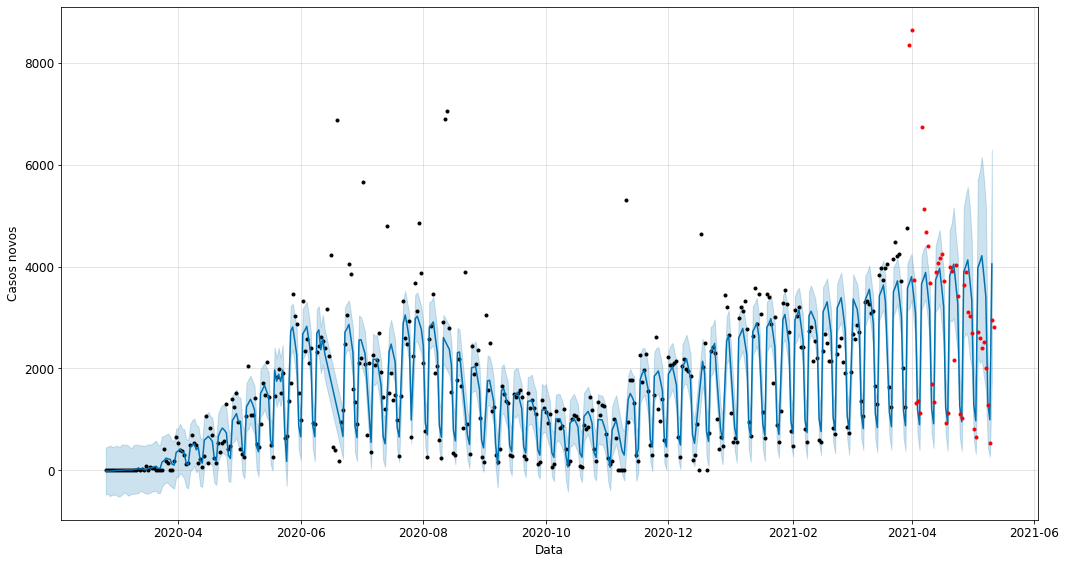

In [ ]:
modelo.plot(previsao,xlabel='Data',ylabel='Casos novos', figsize=(15,8));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

Intervalo de confiança.

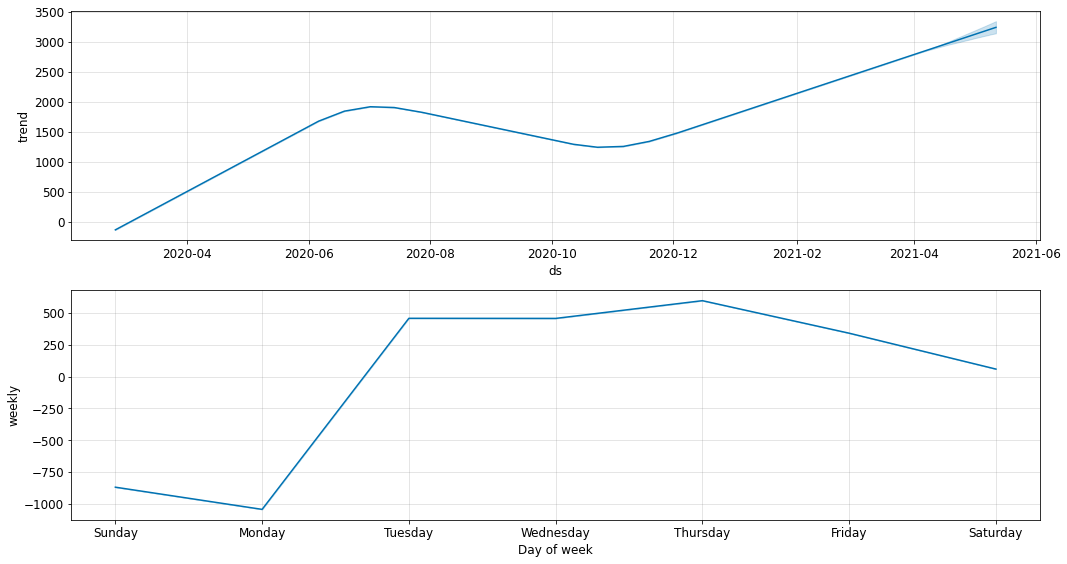

In [ ]:
modelo.plot_components(previsao,figsize=(15,8));

Possíveis mudanças de tendência que numa série temporal geralmente segue um padrão que o conjunto de dados está seguindo e é muito importante para fazer previsões.

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

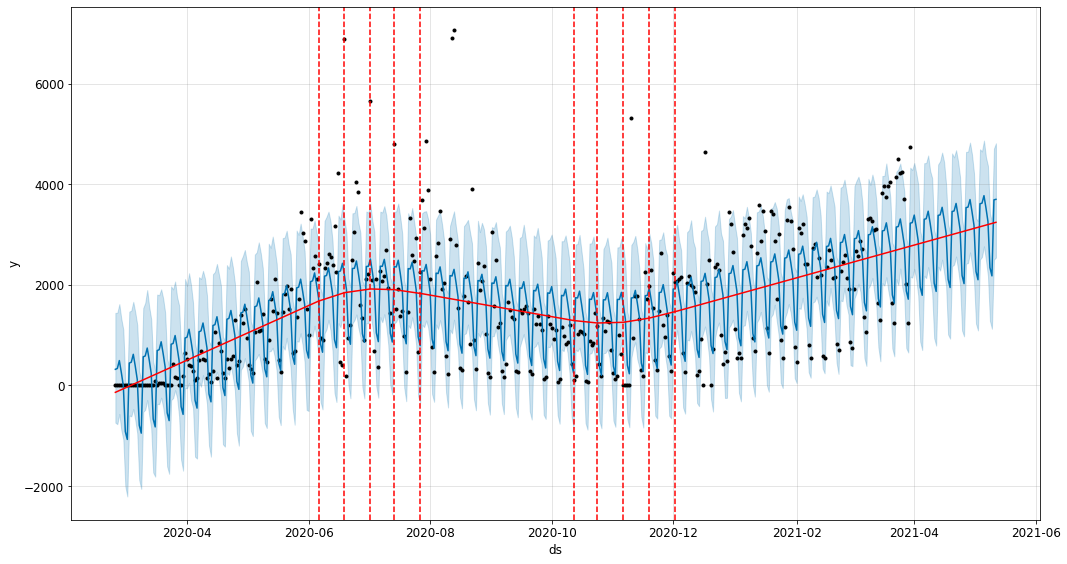

In [ ]:
fig = modelo.plot(previsao, figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [ ]:
modelo = Prophet(changepoint_prior_scale=10.0)

In [ ]:
modelo.add_country_holidays(country_name='BR')

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo.predict(dataframefuturo)

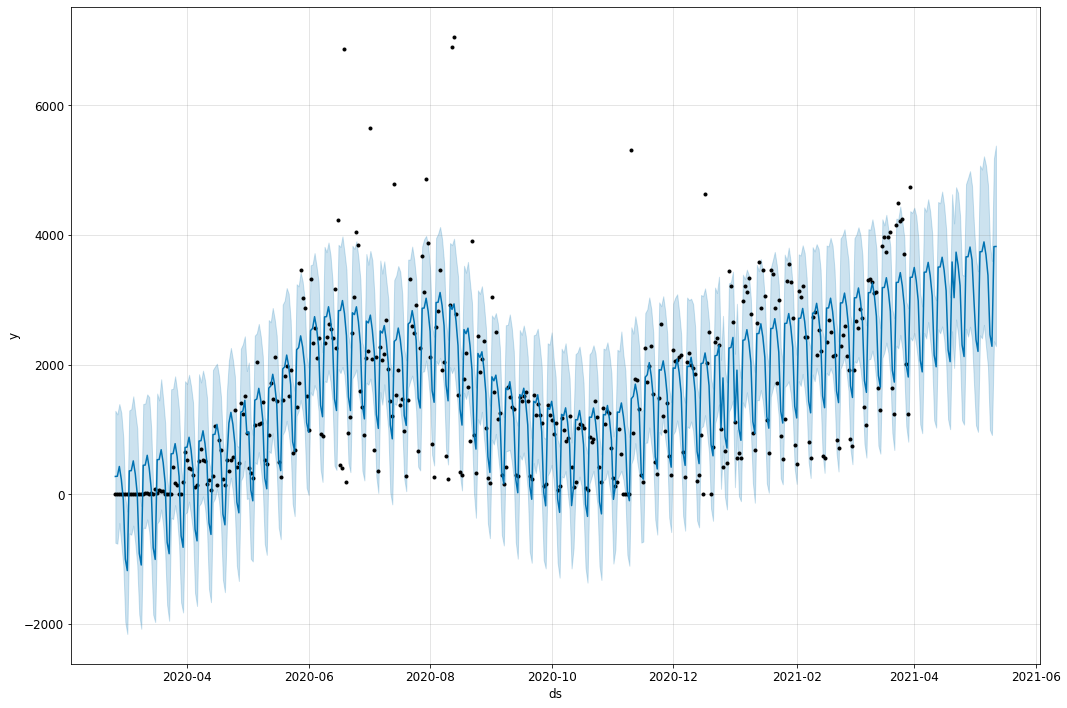

In [ ]:
fig = modelo.plot(previsao , figsize=(15,10))

In [ ]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [ ]:
feriados_sp_2020 = pd.DataFrame({'holiday':'sp_2020','ds': pd.to_datetime(feriados_sp_2020)})

In [ ]:
feriados_sp_2020.head()

,holiday,ds
0,sp_2020,2020-02-25
1,sp_2020,2020-02-26
2,sp_2020,2020-04-10
3,sp_2020,2020-04-21
4,sp_2020,2020-05-01


In [ ]:
feriados_sp_2021 = pd.DataFrame({'holiday':'sp_2021','ds': pd.to_datetime(feriados_sp_2021)})

In [ ]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [ ]:
feriados.head()

,holiday,ds
0,sp_2020,2020-02-25
1,sp_2020,2020-02-26
2,sp_2020,2020-04-10
3,sp_2020,2020-04-21
4,sp_2020,2020-05-01


In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0,holidays=feriados,seasonality_mode='multiplicative')

In [ ]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [ ]:
previsao = modelo_feriados.predict(dataframefuturo)

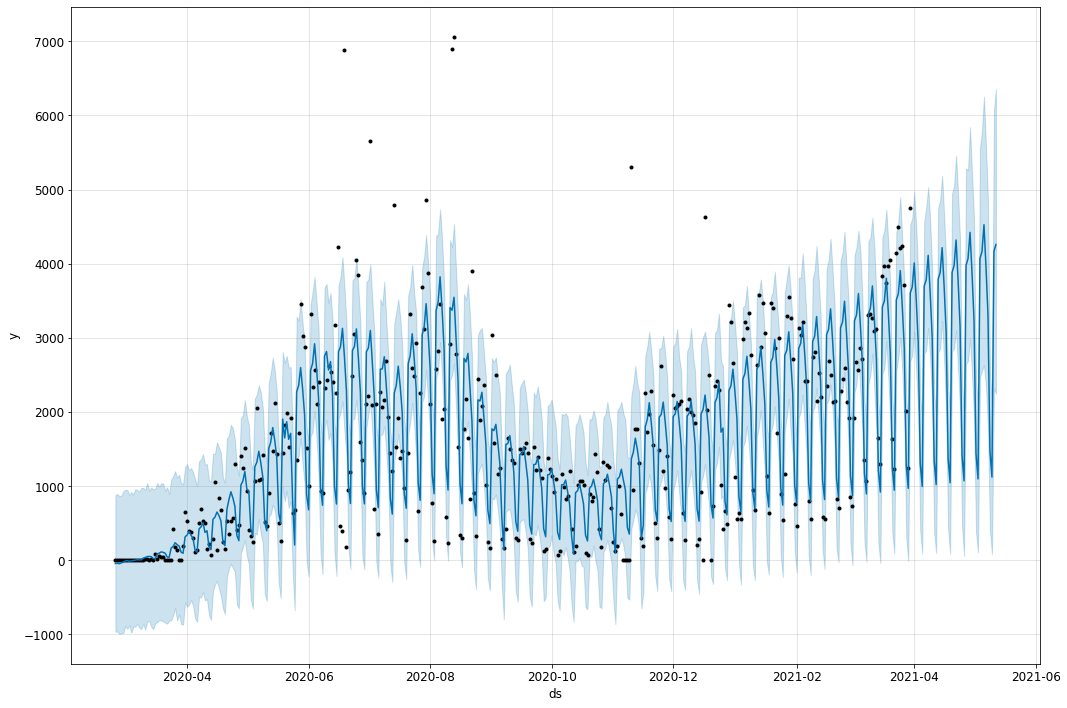

In [ ]:
fig = modelo_feriados.plot(previsao , figsize=(15,10))

No gráfico de feriados, os picos representam um decréscimo de número de casos notificados. O eixo y tem valores negativos entre 0 e -200 (aproximadamente), isso representa um decréscimo de número de casos notificados por conta de feriados.

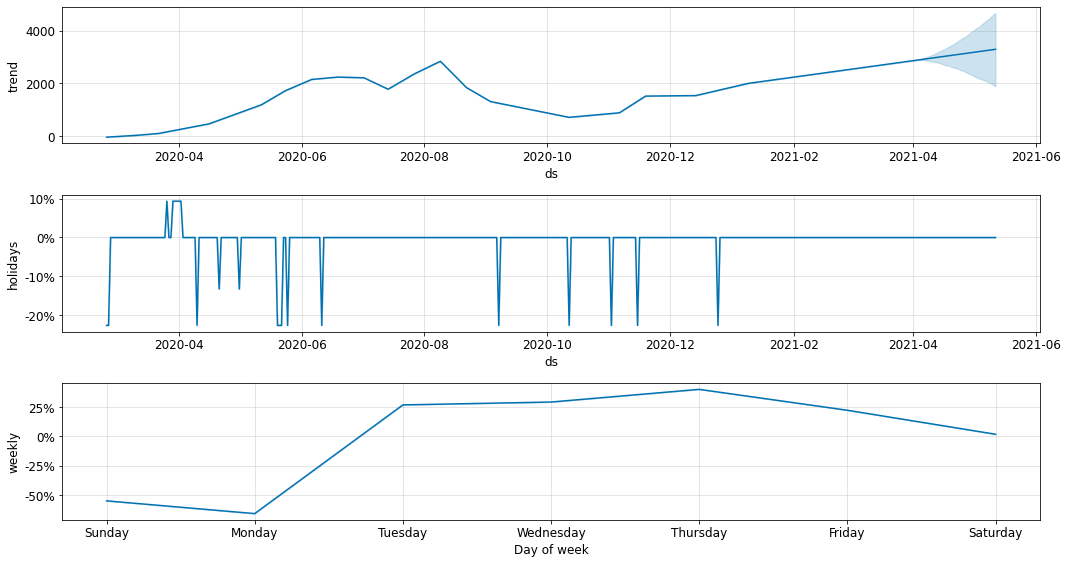

In [ ]:
modelo_feriados.plot_components(previsao,figsize=(15,8));

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Sazonalidade aditiva

mean_absolute_error(df['y'],previsao['yhat'][:400])

538.0474179988163

In [ ]:
# Sazonalidade multiplicativa

mean_absolute_error(df['y'],previsao['yhat'][:400])

452.2884903942229

Removendo outliers

In [ ]:
novo_y = df.reset_index()

In [ ]:
novo_y

,index,ds,y
0,562,2020-02-25,0
1,1207,2020-02-26,0
2,1852,2020-02-27,0
3,2497,2020-02-28,1
4,3142,2020-02-29,0
...,...,...,...
395,255337,2021-03-26,4241
396,255982,2021-03-27,3709
397,256627,2021-03-28,2010
398,257272,2021-03-29,1242


In [ ]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400]) ]

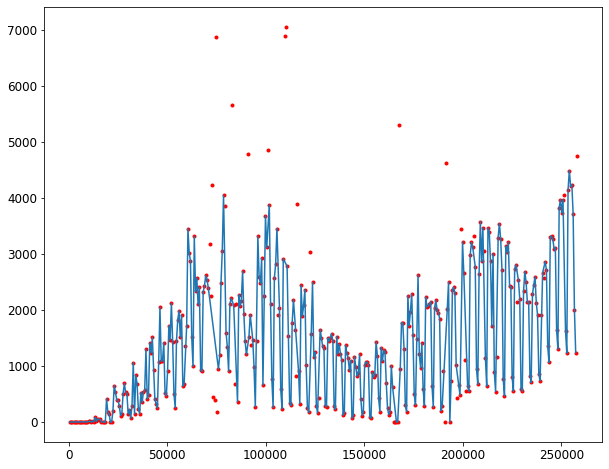

In [ ]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outiliers['index'],sem_outliers['y'])

In [ ]:
df_sem_outliers = sem_outliers[['ds','y']]

In [ ]:
df_sem_outliers

,ds,y
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,1
4,2020-02-29,0
...,...,...
394,2021-03-25,4214
395,2021-03-26,4241
396,2021-03-27,3709
397,2021-03-28,2010


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


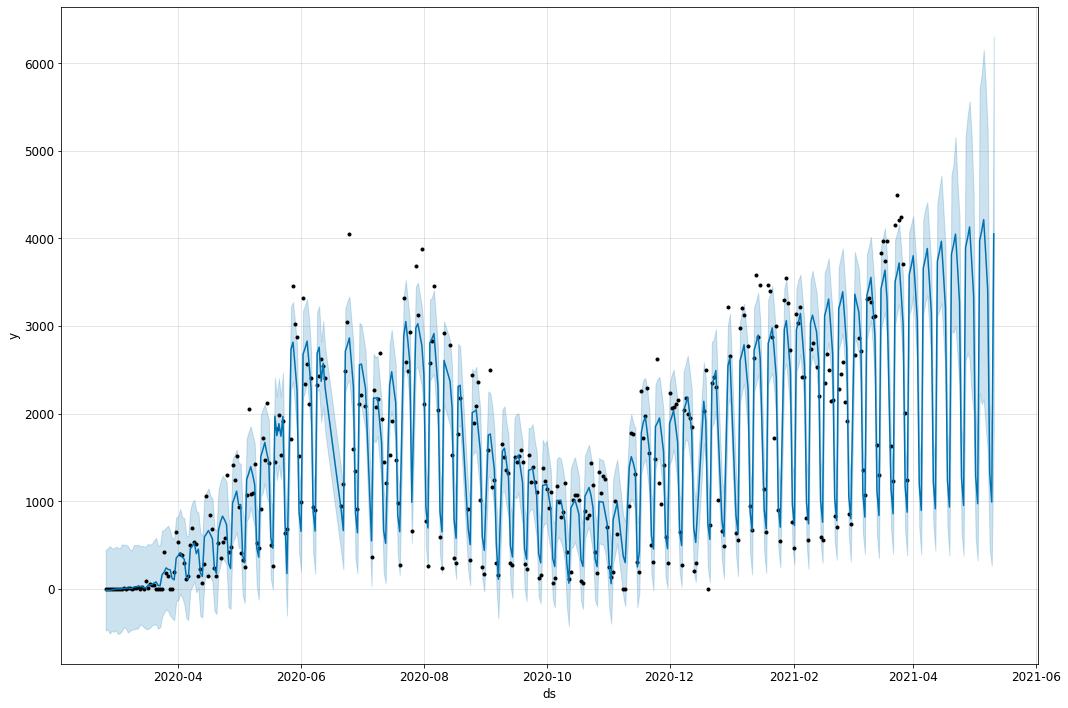

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0,holidays=feriados,seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao , figsize=(15,10))

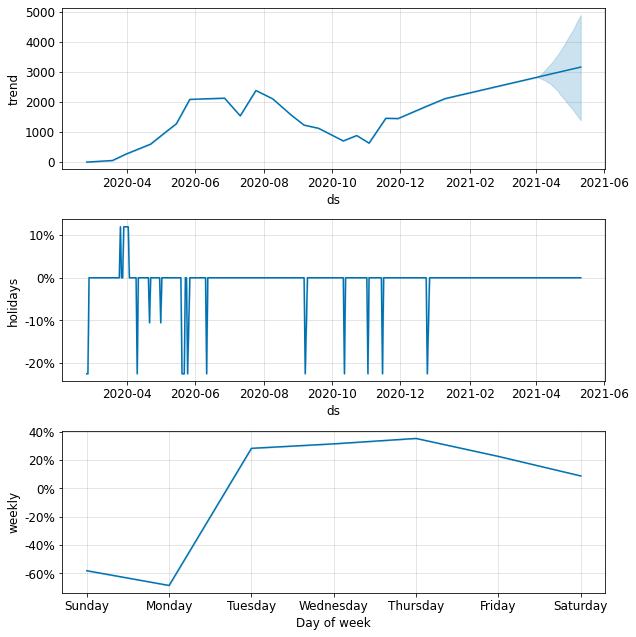

In [ ]:
modelo_feriados.plot_components(previsao);

In [ ]:
amostra = modelo_feriados.predictive_samples(previsao)

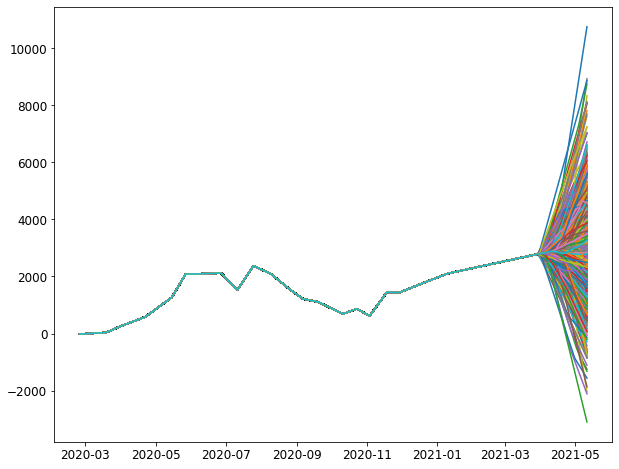

In [ ]:
plt.plot(previsao['ds'],amostra['trend']);

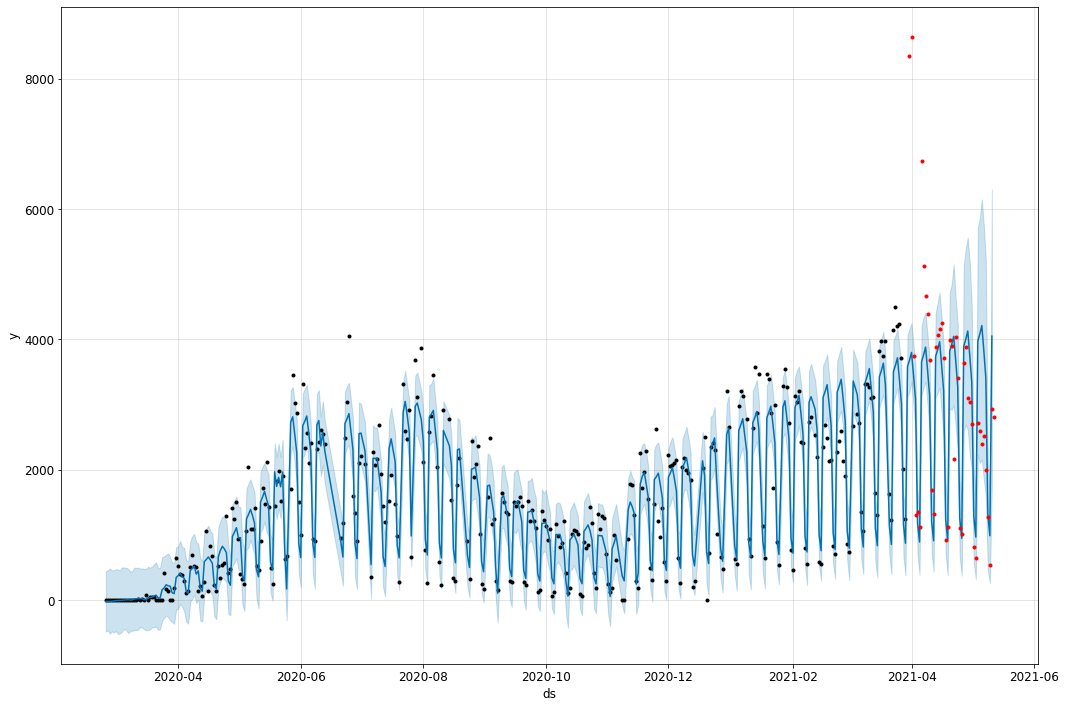

In [ ]:
fig = modelo_feriados.plot(previsao , figsize=(15,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo_feriados , initial='180 days',period ='30 days', horizon ='30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [ ]:
janela = 1

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-02,1870.746908,1462.734633,2353.556835,1579,2020-08-31
1,2020-09-03,2043.049032,1602.185784,2495.792146,2496,2020-08-31
2,2020-09-04,1958.016746,1502.682104,2449.536018,1166,2020-08-31
3,2020-09-05,1484.315284,1024.721786,1939.551971,1245,2020-08-31
4,2020-09-06,625.453398,208.453713,1073.722248,290,2020-08-31


In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]

In [ ]:
df_cv_cut =df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

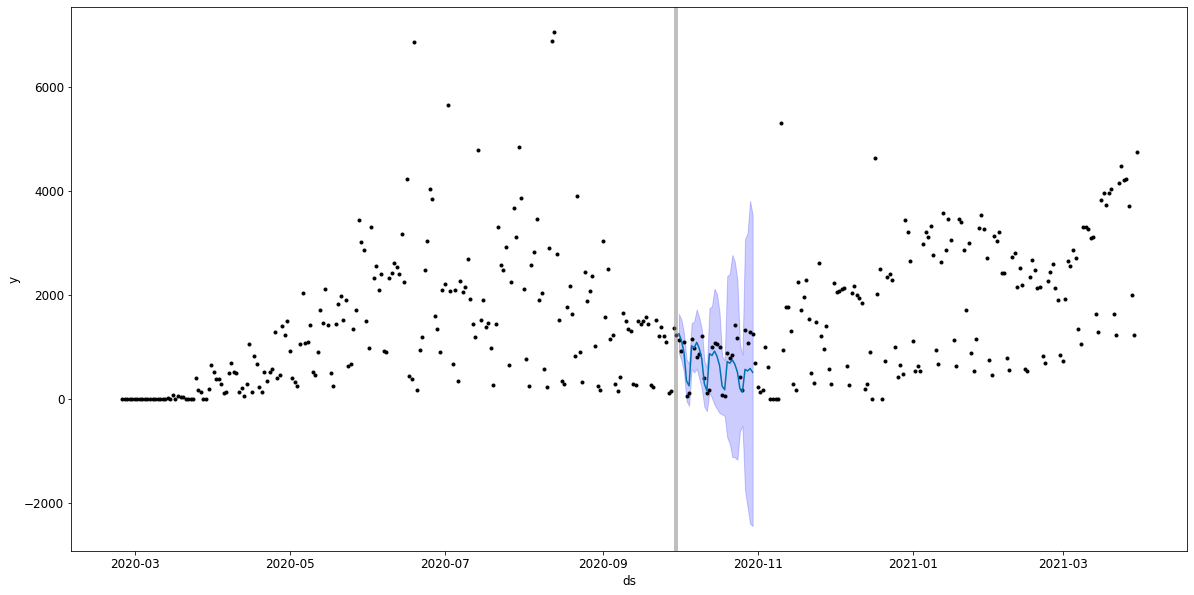

In [ ]:
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cvdf)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_p

,horizon,mse,rmse,mae,mdape,coverage
0,4 days,121360.332911,348.368100,274.098242,0.184767,0.780702
1,5 days,110642.859446,332.630214,269.151298,0.192221,0.827068
2,6 days,131583.514437,362.744420,299.937539,0.192221,0.789474
3,7 days,84742.834190,291.106225,245.899793,0.127800,0.894737
4,8 days,154512.096345,393.080267,326.833225,0.187291,0.736842
5,9 days,146755.809434,383.087209,317.585140,0.135950,0.774436
6,10 days,161065.587208,401.329774,349.142099,0.234136,0.736842
7,11 days,113339.333878,336.659077,300.298841,0.216817,0.894737
8,12 days,114250.560029,338.009704,275.119599,0.179090,0.894737
9,13 days,181966.177347,426.574938,326.846153,0.179090,0.842105


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

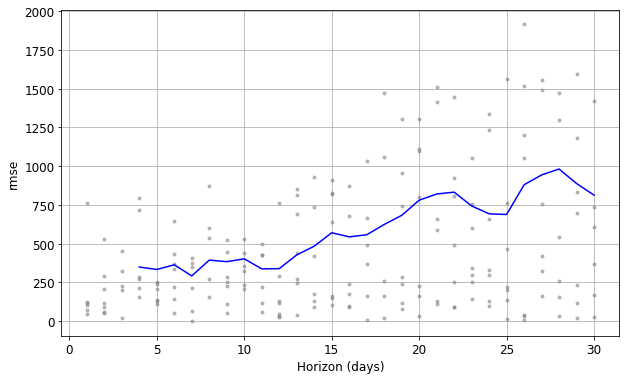

In [ ]:
plot_cross_validation_metric(df_cv,metric='rmse');